In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# DATASET:

In [2]:
df = pd.read_csv('flight price1.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,3/22/2022 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,6/10/2022 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/4/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,1/3/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


This is the overall dataset where we have total 11 features and 10683 rows.from the 11 features Price is the Dependent Variable 
i.e. the Taret variable. Here we have object data also. almost all coulumns contain object data. Here I can see the column Additonal info coloumn where it has only no info data. So I will check further and if its not useful I will drop the column. 
I this data we also have to deal with datetime data.

In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


here I can see all columns contain object data.

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In the data we have two null values in the Route and Total_stops column. so I will drop that null values.

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

now our data does not have any null values.

Handling Date and Time Variables:

In [7]:
df['Journey_day'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey,format='%d/%m/%Y').dt.month
df.drop(['Date_of_Journey'],axis =1,inplace=True)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,3/22/2022 1:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,6/10/2022 4:25,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,8:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


here I have extracted the month and day from the variable date of journey . here the journey day shows the day of the month on which the journey started.similarly, we can extract deaprture hour and minute as well as arrival hour and minute from dep-time and arriaval_time variable respectively.

In [8]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis=1,inplace= True)
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,3/22/2022 1:10,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,6/10/2022 4:25,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [9]:
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_minute'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


now here i will extract duration hours and minute seperately from duration variable.

In [10]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])
df.drop(["Duration"], axis = 1, inplace = True)

In [11]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [12]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************************')
        

Airline:['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
*********************************************************
Source:['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
****************************************

This is the overall info about object data. all columns except Route have categorical data. According to me Route column would not affect on price as its just shows the route . So I will drop the Route Column.

In [13]:
df = df.drop(['Route'],axis=1)

In [14]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,11,30,14,10,2,40


# DATA VISUVALIZATION:

<Figure size 1800x1584 with 0 Axes>

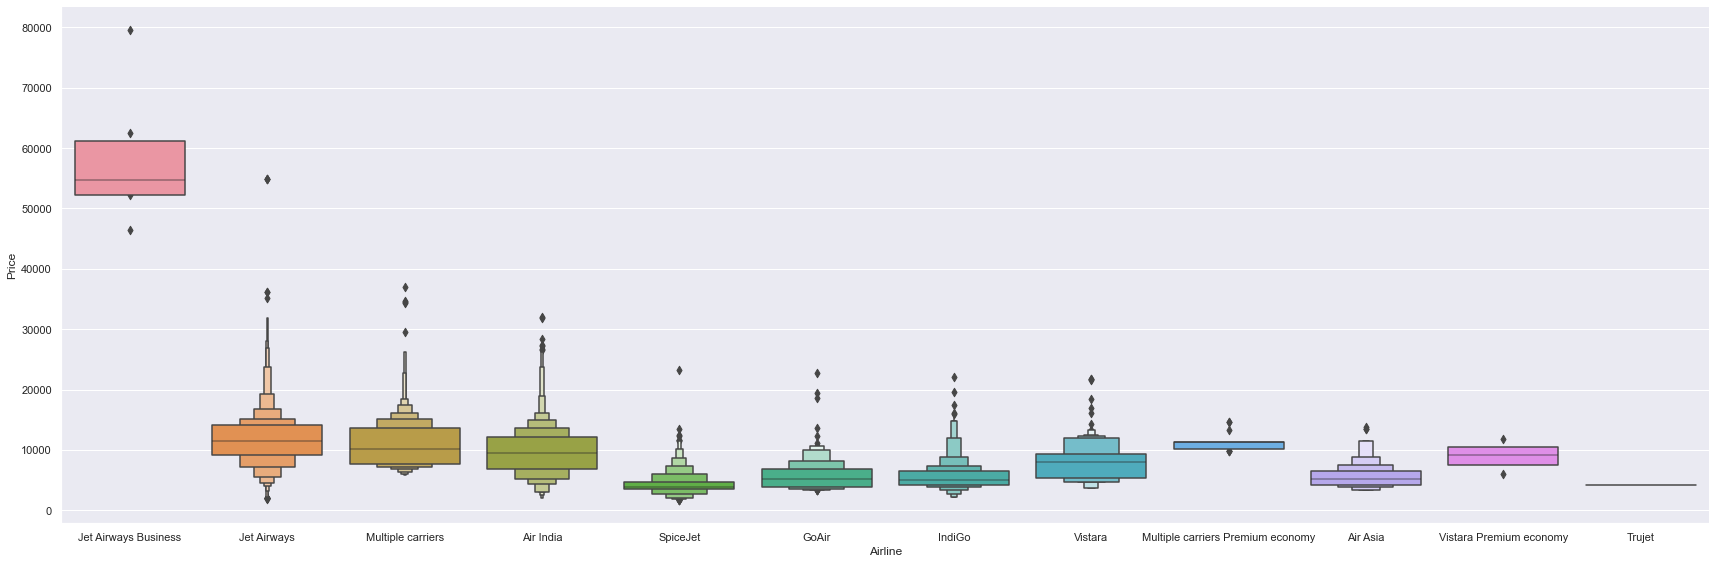

In [15]:
plt.figure(figsize=(25,22))
sns.set()
sns.catplot(y='Price',x= 'Airline',data= df.sort_values('Price',ascending= False),kind='boxen',height=8,aspect=3)
plt.show()

here we can see the name of the airline matters as jet airways has the highest price range other 

In [16]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [17]:
Airline=df[['Airline']]
Airline=pd.get_dummies(Airline,  drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [18]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [19]:
Source=df[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [20]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [21]:
Destination=df[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [22]:
df.drop(['Additional_Info'], axis=1, inplace=True)

In [23]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [24]:
df.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [25]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [26]:
df = df.drop(['Airline','Source','Destination'],axis=1)

In [27]:
df=pd.concat([df, Airline, Source, Destination], axis=1)
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


This is the final dataset having 30 columns.

In [28]:
df.describe()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here I can see the overall statastics of the data where we have min max and mean,standarad deviatiion for all columns.

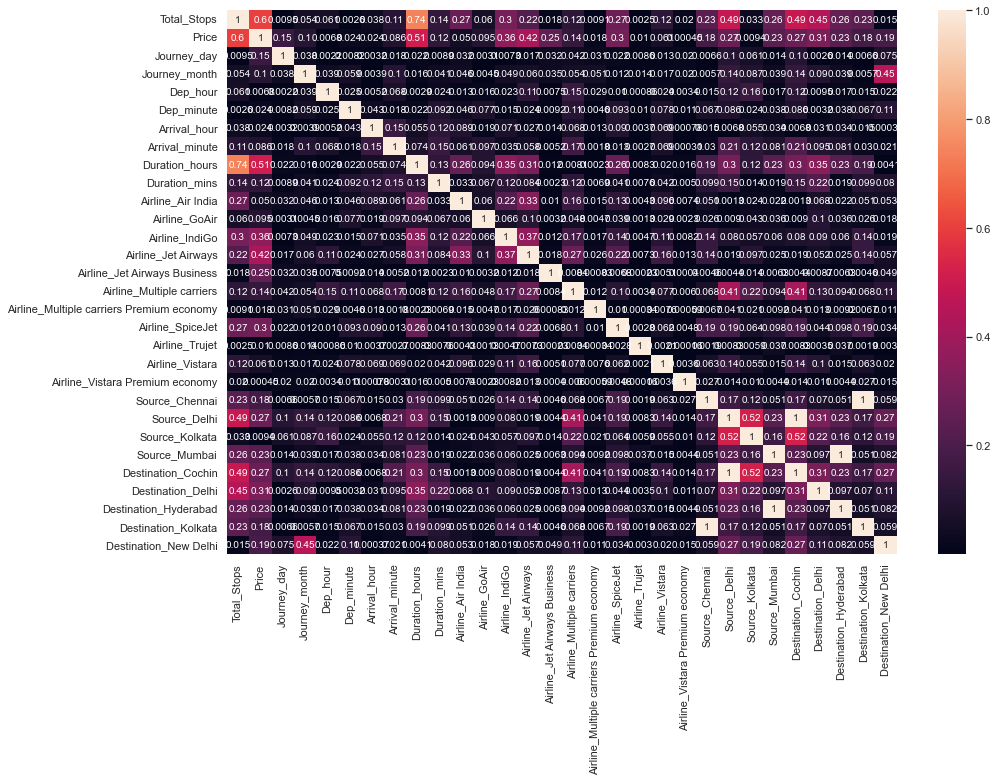

In [29]:
df_corr = df.corr().abs()

plt.figure(figsize =(15,10))
sns.heatmap(df_corr,annot = True, annot_kws={'size':10})
plt.show()

In [30]:
df.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_minute,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,...,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_minute,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,...,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


form above coorealtion chart price is  more corelated with total hours and total stops than any other features.

# Train and Test

In [31]:
X= df.drop(['Price'],axis=1)
y=df['Price']

In [32]:
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [36]:
MaxAccu=0
MaxR=0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = i,test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    print('accuracy',acc,'random_state',i)
    
    if acc>MaxAccu:
        MaxAccu = acc
        MaxR=i
        print('accuracy',MaxAccu,'random_state',i)

accuracy 0.5888639023134972 random_state 0
accuracy 0.5888639023134972 random_state 0
accuracy 0.5997170005927522 random_state 1
accuracy 0.5997170005927522 random_state 1
accuracy 0.6050793819556554 random_state 2
accuracy 0.6050793819556554 random_state 2
accuracy 0.5918691376031033 random_state 3
accuracy 0.6302388455230101 random_state 4
accuracy 0.6302388455230101 random_state 4
accuracy 0.6330796140516746 random_state 5
accuracy 0.6330796140516746 random_state 5
accuracy 0.6213833055360356 random_state 6
accuracy 0.6518382567320284 random_state 7
accuracy 0.6518382567320284 random_state 7
accuracy 0.6296301909217576 random_state 8
accuracy 0.60702820854764 random_state 9
accuracy 0.5737566437319148 random_state 10
accuracy 0.6241697090605604 random_state 11
accuracy 0.6020678865066551 random_state 12
accuracy 0.6599511727508742 random_state 13
accuracy 0.6599511727508742 random_state 13
accuracy 0.6501290716854169 random_state 14
accuracy 0.618314710493953 random_state 15
accurac

In [37]:
print('Best Acuracy',MaxAccu,'Random State',MaxR)

Best Acuracy 0.6812330093374057 Random State 195


In [38]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor(random_state=0)
dr.fit(x_train, y_train)
y_pred=dr.predict(x_test)
dr.score(x_test,y_test)

0.762002516388143

In [39]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor(n_estimators=100, random_state=0)
rd.fit(x_train, y_train)
y_pred=rd.predict(x_test)
rd.score(x_test,y_test)

0.8176085642377418

from above models We can see that Random Forest Regressor is giving highest accuracy which is 81% 

In [40]:
from sklearn import metrics

In [41]:
metrics.mean_absolute_error(y_test, y_pred)

1179.2340411888456

In [42]:
metrics.mean_squared_error(y_test, y_pred)

4526240.884463078

In [43]:
metrics.r2_score(y_test, y_pred)

0.8176085642377418

# cross validation of the model:

import pickle
file = open('flight_model.pkl', 'wb')
pickle.dump(regressor, file)
model=open('flight_model.pkl', 'rb')
flight_price=pickle.load(model)

In [44]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rd,X,y,cv=3)
print("Cross Validation Score for Random Forest Regressor Model is:-",scr.mean())

Cross Validation Score for Random Forest Regressor Model is:- 0.8021860508237634


cross validation score is also good  which is 80% almost near to model score.so my model is not overfitting. Now I will apply hyperparameter tuning to rich the highest accuracy

# HyperParameter Tuning:

In [45]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[20,50,60,100],'criterion':['squared_error']}
    


In [46]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error', 'n_estimators': 20}

In [47]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [48]:
GCV.best_estimator_

RandomForestRegressor(n_estimators=20)

In [49]:
GCV_pred = GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.8211110744287647

Here the after applying hyperparameter tuning model is giving 82% socre. So I am saving this model as final model

In [50]:
import pickle
file = open('flight_model.pkl', 'wb')
pickle.dump(GCV.best_estimator_, file)
model=open('flight_model.pkl', 'rb')
flight_price=pickle.load(model)